# Analyzing and Predicting Heart Disease Using the Heart Failure Prediction Dataset

In [186]:
# Importation of Python Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [187]:
# Data loading
df = pd.read_csv(r'C:\Users\34661\Downloads\heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [188]:
# Displaying basic information about the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  1

In [189]:
# Checking if i have null values
na = df[df.isna().any(axis = 1)]
na

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [190]:
# Dropping duplicates
df.drop_duplicates(inplace = True)


# Exploratory Data Analysis (EDA)

In [191]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# a) Age Distribution: 

In [192]:
# 1. How many individuals in the dataset have been diagnosed with heart disease, and how many do not exhibit any signs of heart disease?

HeartDisease
1    508
0    410
Name: count, dtype: int64


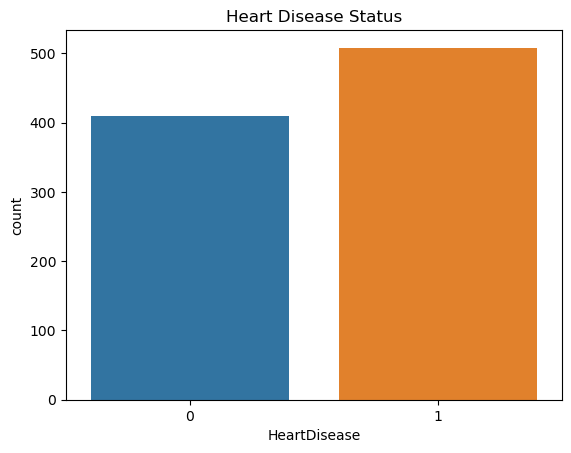

In [193]:
heart_distribution = df['HeartDisease'].value_counts()
print(heart_distribution)


# Countplot of Heart Disease
sns.countplot(x = 'HeartDisease', data = df)
plt.title('Heart Disease Status')
plt.show()

In [194]:
# 2. Is there a difference in age distribution between patients with heart disease and those without?

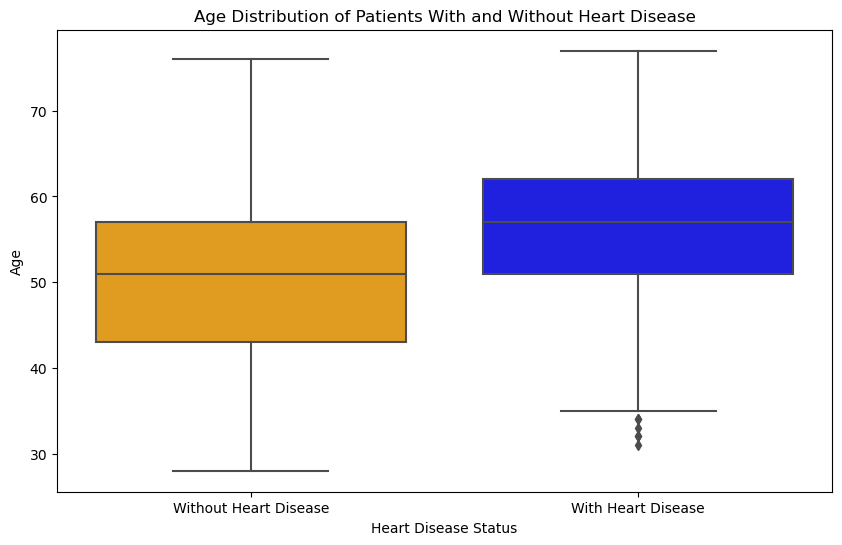

In [195]:
# Visualizing Age distribution between patients with heart disease and those without
plt.figure(figsize=(10,6))
sns.boxplot(x='HeartDisease', y='Age', data=df, palette=['orange', 'blue'])
plt.title('Age Distribution of Patients With and Without Heart Disease')
plt.xlabel('Heart Disease Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['Without Heart Disease', 'With Heart Disease'])
plt.show()

# b) Sex Distribution

In [196]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Sex
M    725
F    193
Name: count, dtype: int64


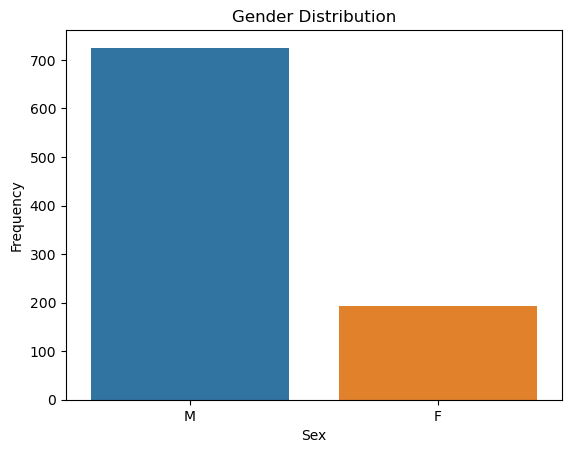

In [197]:
# Counting how many men and women are in the dataset
gender_distribution = df['Sex'].value_counts()
print(gender_distribution)

# Visualizing it
sns.countplot(x = 'Sex', data = df)
plt.title('Gender Distribution')
plt.ylabel('Frequency')
plt.show()

C:\Users\34661\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


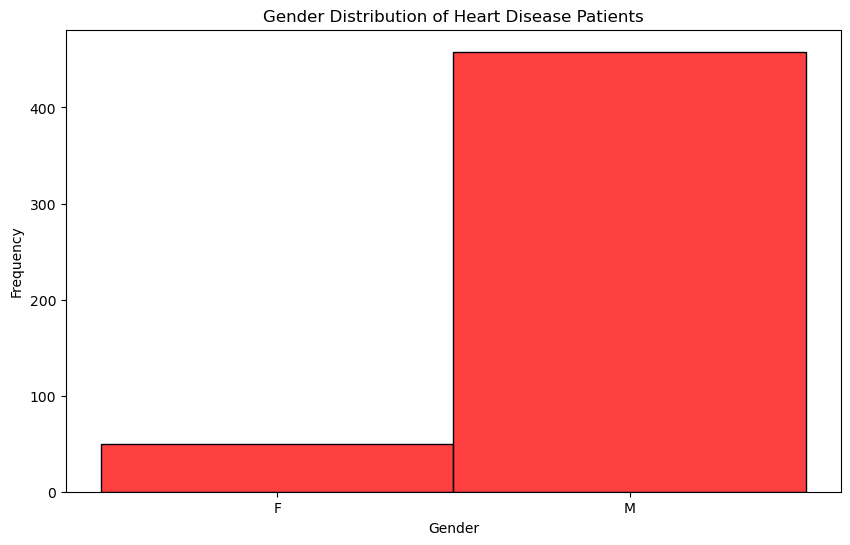

In [198]:
# Seperating datasets for individuals with  Heart Disease
with_disease = df[df['HeartDisease'] == 1]


# Visualizing distribution using histograms
plt.figure(figsize = (10,6))
sns.histplot(x = 'Sex', color = 'red', data = with_disease)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution of Heart Disease Patients')
plt.show()

C:\Users\34661\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


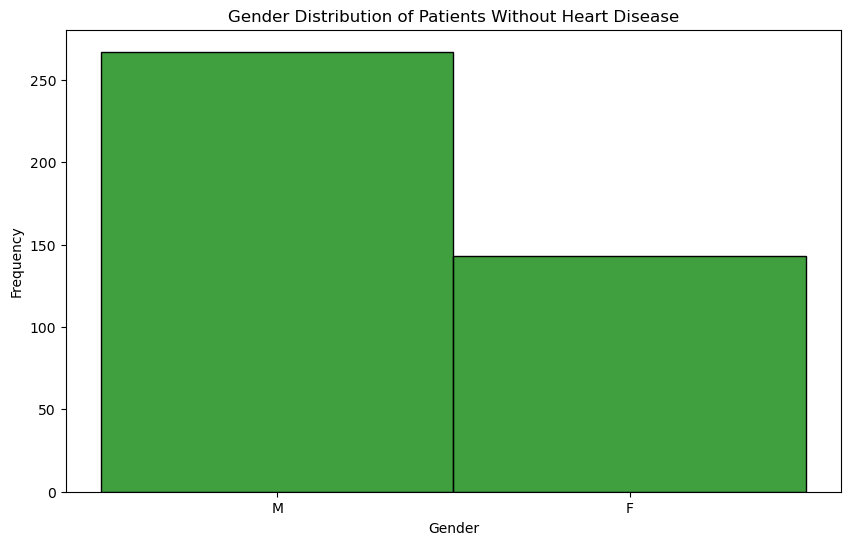

In [199]:
# Visualizing Gender Distribution of people without heart disease
without_disease = df[df['HeartDisease'] == 0]


# Visualizing
plt.figure(figsize = (10,6))
sns.histplot(x = 'Sex', color = 'Green', data = without_disease)
plt.title('Gender Distribution of Patients Without Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

# c) Chest Pain Type Analysis

In [200]:
# What are the frequencies of different chest pain types (Typical Angina, Atypical Angina, Non-Anginal Pain, Asymptomatic)?

In [201]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


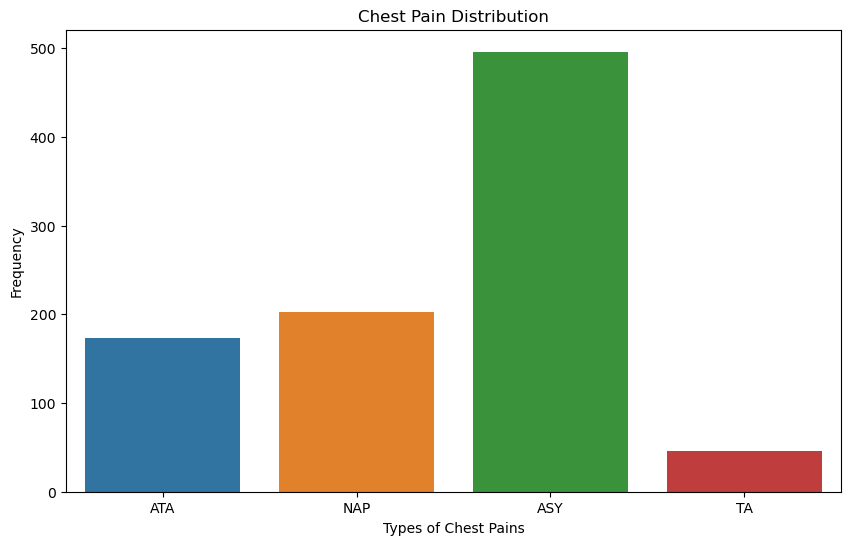

In [202]:
# Getting the distribution
chest_pain_frequency = df['ChestPainType'].value_counts()
print(chest_pain_frequency)


plt.figure(figsize = (10, 6))
sns.countplot(x = 'ChestPainType', data = df)
plt.title('Chest Pain Distribution')
plt.xlabel('Types of Chest Pains')
plt.ylabel('Frequency')
plt.show()

In [203]:
# Is there an association between chest pain type and the presence of heart disease?

Chi-Square Test: chi2 = 268.06723902181767, p-value = 8.08372842808765e-58


<Figure size 1200x800 with 0 Axes>

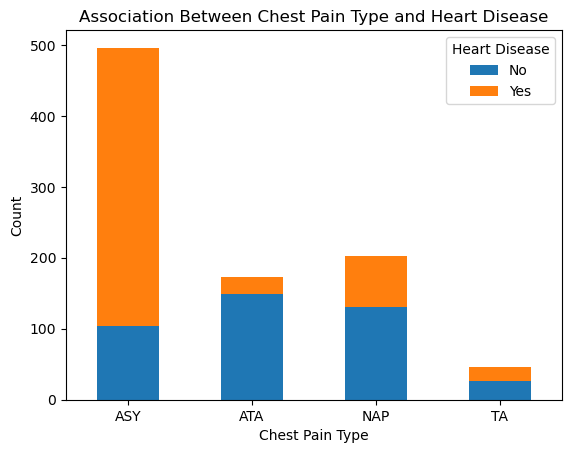

Counts of individuals with heart disease in each category of chest pain type:
ChestPainType
ASY    392
ATA     24
NAP     72
TA      20
Name: 1, dtype: int64
There is a significant association between chest pain type and the presence of heart disease.


In [204]:
# Ensure HeartDisease is treated as a categorical variable
df['HeartDisease'] = df['HeartDisease'].astype('category')

# Ensure ChestPainType is treated as a string (if it isn't already)
df['ChestPainType'] = df['ChestPainType'].astype(str)

# Create a cross-tabulation of chest pain type and heart disease
chest_pain_heart_disease = pd.crosstab(df['ChestPainType'], df['HeartDisease'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(chest_pain_heart_disease)
print(f'Chi-Square Test: chi2 = {chi2}, p-value = {p}')

# Create a stacked bar plot
plt.figure(figsize=(12, 8))
chest_pain_heart_disease.plot(kind='bar', stacked=True)
plt.title('Association Between Chest Pain Type and Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

# Extract the row corresponding to individuals with heart disease
heart_disease_counts = chest_pain_heart_disease.loc[:, 1]

# Print the counts of individuals with heart disease in each category of chest pain type
print("Counts of individuals with heart disease in each category of chest pain type:")
print(heart_disease_counts)

# Interpret the result
alpha = 0.05
if p < alpha:
    print("There is a significant association between chest pain type and the presence of heart disease.")
else:
    print("There is no significant association between chest pain type and the presence of heart disease.")

# d) Resting Blood Pressure (RestingBP) Analysis 

In [205]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


C:\Users\34661\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34661\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


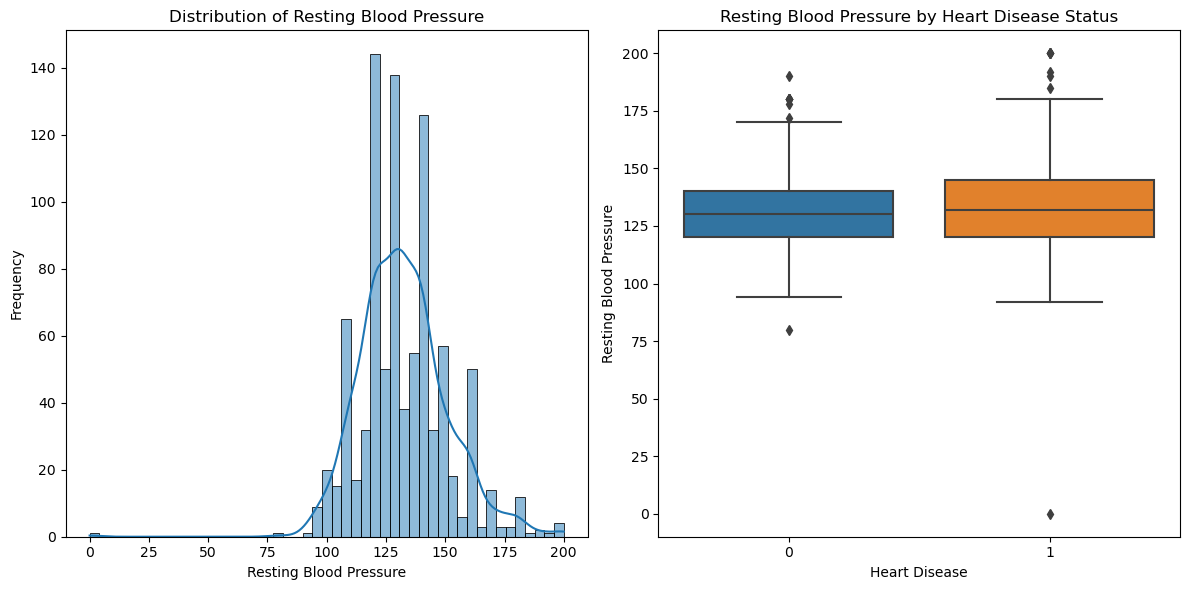

In [206]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the distribution of resting blood pressure among all patients
sns.histplot(data=df, x='RestingBP', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Resting Blood Pressure')
axes[0].set_xlabel('Resting Blood Pressure')
axes[0].set_ylabel('Frequency')

# Plot box plots to compare resting blood pressure between patients with and without heart disease
sns.boxplot(x='HeartDisease', y='RestingBP', data=df, ax=axes[1])
axes[1].set_title('Resting Blood Pressure by Heart Disease Status')
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('Resting Blood Pressure')

# Show the plots
plt.tight_layout()
plt.show()


# e) Cholestrol Level Analysis

In [207]:
# 1. What is the distribution of serum cholesterol levels among patients?
# 2. Is there a difference in cholesterol levels between patients with and without heart disease?

C:\Users\34661\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34661\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


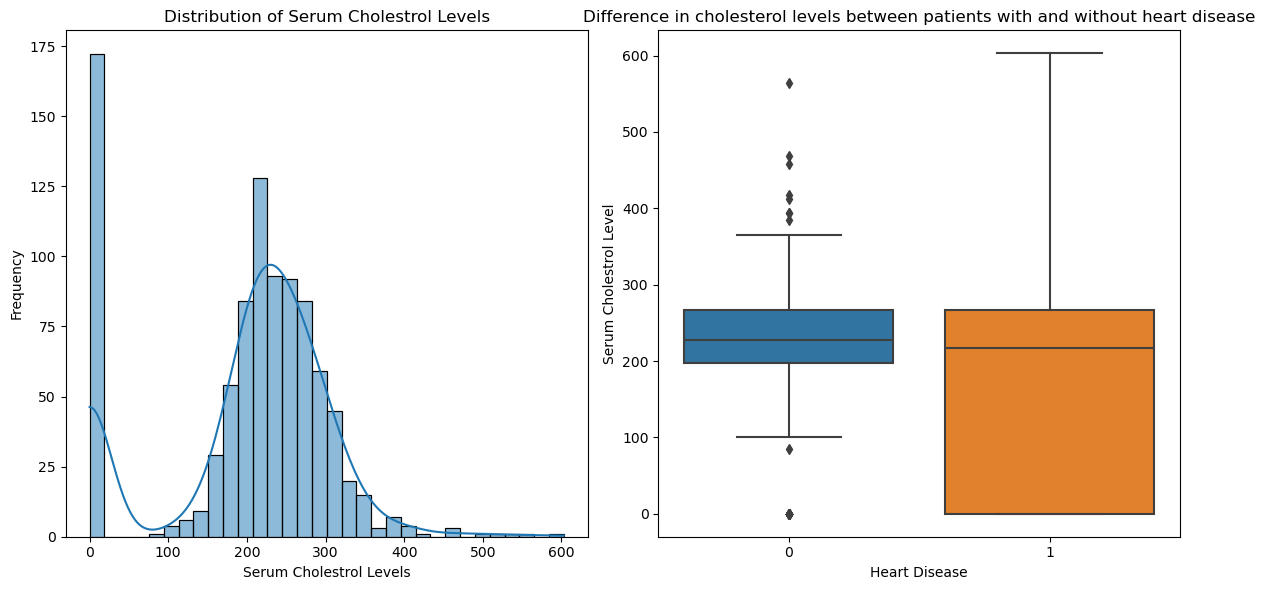

In [208]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the distribution of resting blood pressure among all patients
sns.histplot(data=df, x='Cholesterol', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Serum Cholestrol Levels')
axes[0].set_xlabel('Serum Cholestrol Levels')
axes[0].set_ylabel('Frequency')

# Plot box plots to compare resting blood pressure between patients with and without heart disease
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df, ax=axes[1])
axes[1].set_title('Difference in cholesterol levels between patients with and without heart disease')
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('Serum Cholestrol Level')

# Show the plots
plt.tight_layout()
plt.show()

# f) Fasting Blood Sugar (FastingBS) Analysis

In [209]:
# 1. What proportion of patients have fasting blood sugar levels above 120 mg/dl?
# 2. Is there a correlation between fasting blood sugar levels and the presence of heart disease?

In [210]:
from scipy.stats import pearsonr

above_120 = df[df['FastingBS'] == 1].shape[0]
total_patients = df.shape[0]
proportion_above_120 = above_120 / total_patients
print(f'Proportion of patients with fasting blood sugar levels above 120 mg/dl: {proportion_above_120:.2f}')

# Coorelation between fasting blood sugar levels and the presence of heart disease
correlation, p_value = pearsonr(df['FastingBS'], df['HeartDisease'])
print(f"Correlation between fasting blood sugar levels and presence of heart disease: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")

Proportion of patients with fasting blood sugar levels above 120 mg/dl: 0.23
Correlation between fasting blood sugar levels and presence of heart disease: 0.27
P-value: 0.00


# g) Resting Electrocardiogram (RestingECG) Analysis

In [211]:
# 1. What are the frequencies of different resting electrocardiogram results (Normal, ST-T wave abnormality, Left Ventricular Hypertrophy)?
# 2. Is there an association between abnormal resting electrocardiogram results and heart disease?

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64


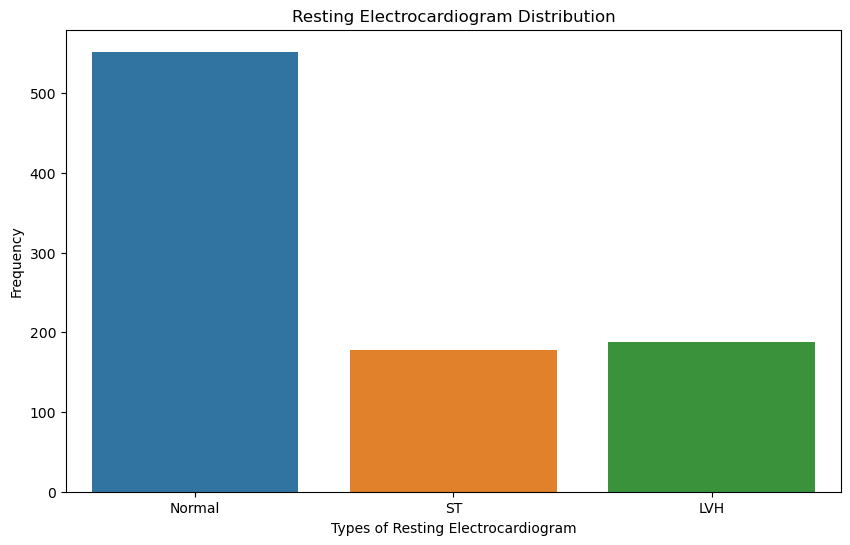

Chi-Square Test: chi2 = 10.931469339140978, p-value = 0.0042292328167544925


<Figure size 1200x800 with 0 Axes>

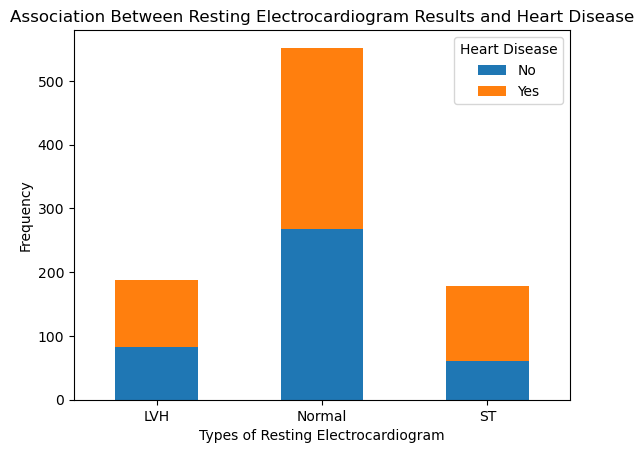

Counts of individuals with heart disease in each category of resting electrocardiogram result:
RestingECG
LVH       106
Normal    285
ST        117
Name: 1, dtype: int64
There is a significant association between resting electrocardiogram results and heart disease.


In [213]:
# Answer to no.1:
# Getting the distribution
restingecg_frequency = df['RestingECG'].value_counts()
print(restingecg_frequency)

plt.figure(figsize=(10, 6))
sns.countplot(x='RestingECG', data=df)
plt.title('Resting Electrocardiogram Distribution')
plt.xlabel('Types of Resting Electrocardiogram')
plt.ylabel('Frequency')
plt.show()

# Answer to no.2:
# Ensure HeartDisease is treated as a categorical variable
df['HeartDisease'] = df['HeartDisease'].astype('category')

# Create a cross-tabulation of resting electrocardiogram results and heart disease
results = pd.crosstab(df['RestingECG'], df['HeartDisease'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(results)
print(f'Chi-Square Test: chi2 = {chi2}, p-value = {p}')

# Create a stacked bar plot
plt.figure(figsize=(12, 8))
results.plot(kind='bar', stacked=True)
plt.title('Association Between Resting Electrocardiogram Results and Heart Disease')
plt.xlabel('Types of Resting Electrocardiogram')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

# Print the counts of individuals with heart disease in each category of resting electrocardiogram result
print("Counts of individuals with heart disease in each category of resting electrocardiogram result:")
print(results[1])

# Interpret the result
alpha = 0.05
if p < alpha:
    print("There is a significant association between resting electrocardiogram results and heart disease.")
else:
    print("There is no significant association between resting electrocardiogram results and heart disease.")

# h) Maximum Heart Rate (MaxHR) Analysis

In [214]:
# 1. What is the distribution of maximum heart rates achieved by patients?
# 2. Is there a difference in maximum heart rates between patients with heart disease and those without?

C:\Users\34661\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\34661\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


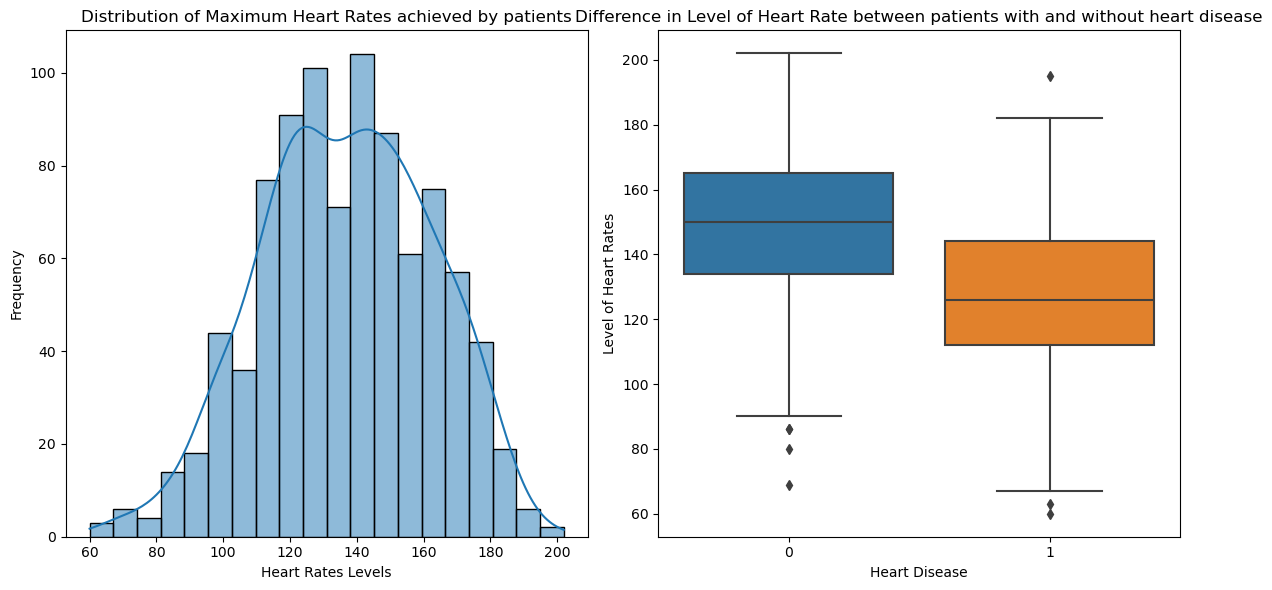

In [215]:
# Answer to No.1 and No.2
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot the distribution of resting blood pressure among all patients
sns.histplot(data=df, x='MaxHR', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Maximum Heart Rates achieved by patients')
axes[0].set_xlabel('Heart Rates Levels')
axes[0].set_ylabel('Frequency')

# Plot box plots to compare maximum heart rates between patients with heart disease and those without
sns.boxplot(x='HeartDisease', y='MaxHR', data=df, ax=axes[1])
axes[1].set_title('Difference in Level of Heart Rate between patients with and without heart disease')
axes[1].set_xlabel('Heart Disease')
axes[1].set_ylabel('Level of Heart Rates')

# Show the plots
plt.tight_layout()
plt.show()

# i) Exercise-Induced Angina (ExerciseAngina) Analysis

In [216]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [217]:
# Counting number of patients with exercise-induced angina
exercise_angina_frequency = df[df['ExerciseAngina'] == 'Y'].shape[0]

# Calculating proportion of patients with exercise-induced angina
total = df.shape[0]
proportion_exercise_angina = exercise_angina_frequency / total_patients

print(f"Proportion of patients experiencing exercise-induced angina: {proportion_exercise_angina:.2f}")

# Calculating proportion of patients with exercise-induced angina among those with heart disease
exercise_angina_with_heart_disease_count = df[(df['ExerciseAngina'] == 'Y') & (df['HeartDisease'] == 1)].shape[0]
total_patients_with_heart_disease = df[df['HeartDisease'] == 1].shape[0]
proportion_exercise_angina_with_heart_disease = exercise_angina_with_heart_disease_count / total_patients_with_heart_disease

print(f"Proportion of patients with heart disease experiencing exercise-induced angina: {proportion_exercise_angina_with_heart_disease:.2f}")

# Compare proportions
if proportion_exercise_angina_with_heart_disease > proportion_exercise_angina:
    print("Exercise-induced angina is more common among patients with heart disease.")
else:
    print("Exercise-induced angina is not more common among patients with heart disease.")

Proportion of patients experiencing exercise-induced angina: 0.40
Proportion of patients with heart disease experiencing exercise-induced angina: 0.62
Exercise-induced angina is more common among patients with heart disease.


# j) Oldpeak (ST Depression) Analysis

In [218]:
# 1. What is the distribution of ST depression values among patients?
# 2. Is there a correlation between ST depression and the presence of heart disease?

In [219]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


C:\Users\34661\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


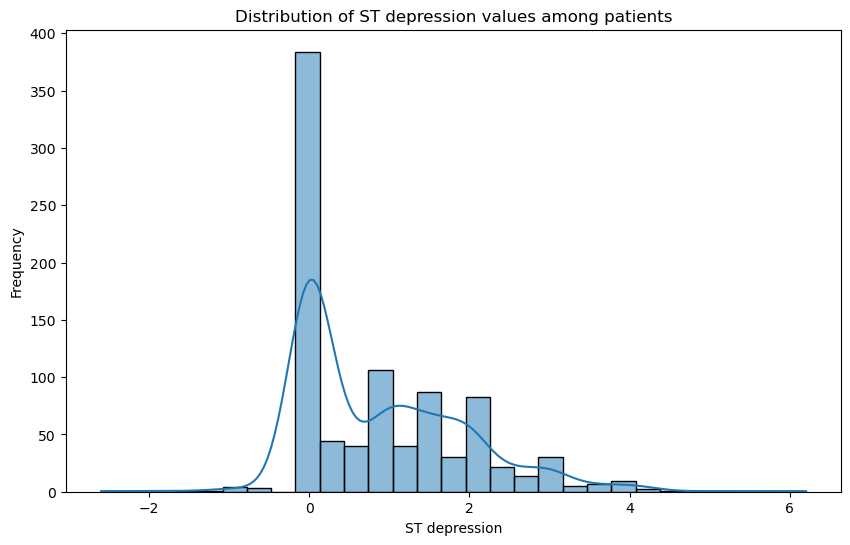

Correlation between ST depression and presence of heart disease: 0.40
P-value: 0.00
There is a significant correlation between ST depression and the presence of heart disease.


In [220]:
from scipy.stats import pearsonr
# Answer to no.1:
plt.figure(figsize = (10, 6))
sns.histplot(df['Oldpeak'],kde=True)
plt.title('Distribution of ST depression values among patients')
plt.xlabel('ST depression')
plt.ylabel('Frequency')
plt.show()

# Answer to no.2:
# Calculate correlation between ST depression and presence of heart disease
correlation, p_value = pearsonr(df['Oldpeak'], df['HeartDisease'])
print(f"Correlation between ST depression and presence of heart disease: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")

# Concluding the result
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation between ST depression and the presence of heart disease.")
else:
    print("There is no significant correlation between ST depression and the presence of heart disease.")

# k) ST Segment Slope (ST_Slope) Analysis

In [221]:
# 1. What are the frequencies of different ST segment slope types (Upsloping, Flat, Downsloping)?
# 2. Is there an association between ST segment slope and the likelihood of heart disease?

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


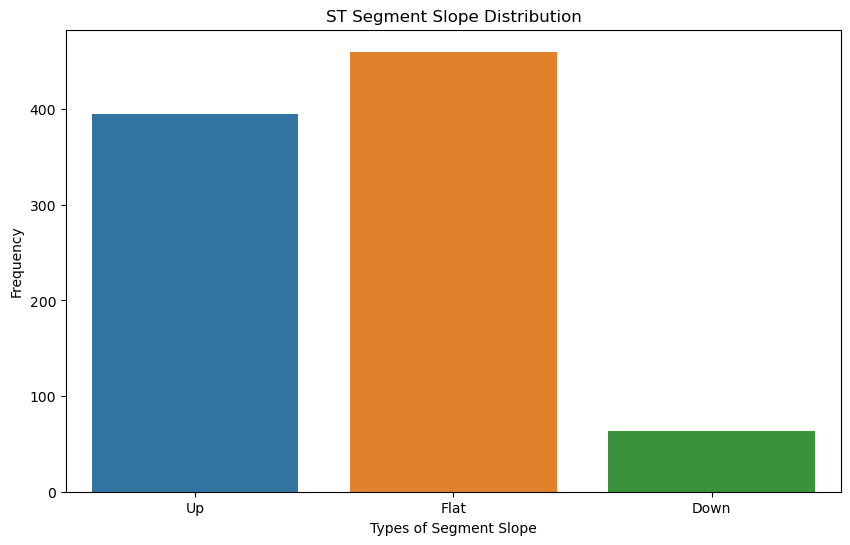

Chi-Square Test: chi2 = 355.91844319207905, p-value = 5.167637689470128e-78


<Figure size 1200x800 with 0 Axes>

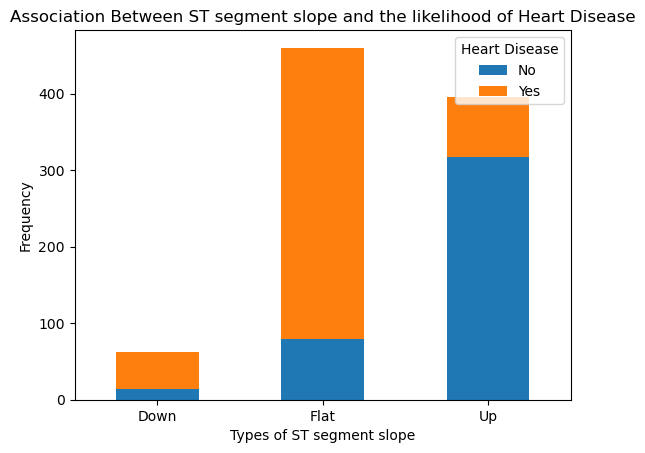

Counts of individuals with heart disease in each category of ST segment slope:
ST_Slope
Down     49
Flat    381
Up       78
Name: 1, dtype: int64
There is a significant association between ST segment slope and heart disease.


In [222]:
# Answer to no.1:
# Getting the distribution
segment_slope_frequency = df['ST_Slope'].value_counts()
print(segment_slope_frequency)

plt.figure(figsize=(10, 6))
sns.countplot(x='ST_Slope', data=df)
plt.title('ST Segment Slope Distribution')
plt.xlabel('Types of Segment Slope')
plt.ylabel('Frequency')
plt.show()

# Answer to no.2:
# Ensure HeartDisease is treated as a categorical variable
df['HeartDisease'] = df['HeartDisease'].astype('category')

# Create a cross-tabulation of resting electrocardiogram results and heart disease
results = pd.crosstab(df['ST_Slope'], df['HeartDisease'])

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(results)
print(f'Chi-Square Test: chi2 = {chi2}, p-value = {p}')

# Create a stacked bar plot
plt.figure(figsize=(12, 8))
results.plot(kind='bar', stacked=True)
plt.title('Association Between ST segment slope and the likelihood of Heart Disease')
plt.xlabel('Types of ST segment slope')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()

# Print the counts of individuals with heart disease in each category of resting electrocardiogram result
print("Counts of individuals with heart disease in each category of ST segment slope:")
print(results[1])

# Interpret the result
alpha = 0.05
if p < alpha:
    print("There is a significant association between ST segment slope and heart disease.")
else:
    print("There is no significant association between ST segment slope and heart disease.")

# LINEAR REGRESSION

# A) How does maximum heart rate achieved (MaxHR) relate to the likelihood of heart disease, considering age and Sex as potential predictors?

In [223]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [224]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv(r'C:\Users\34661\Downloads\heart.csv')

# Inspect the first few rows and column names to ensure we have the correct data
print(df.head())
print(df.columns)

# Create a binary column for 'Sex' for logistic regression
df['Sex_binary'] = df['Sex'].apply(lambda x: 1 if x == 'M' else 0)

# Prepare data for logistic regression
X = df[['Age', 'Sex_binary', 'MaxHR']]  
y = df['HeartDisease']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the logistic regression model
print(model.summary())

# Clean up: Remove the 'Sex_binary' column if not needed for other analyses
df.drop(columns=['Sex_binary'], inplace=True)


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Optimizatio

In [2]:
# Findings:
# a) Age: For every one-year increase in age, the log-odds of having heart disease increase by 0.0418. This is statistically significant, implying that older individuals are more likely to have heart disease.
# b) Sex: Being male increases the log-odds of having heart disease by 1.4517. This is highly statistically significant, suggesting a strong association between being male and a higher likelihood of heart disease.
# c) MaxHR: For every one-unit increase in maximum heart rate achieved, the log-odds of having heart disease decrease by 0.0295. This negative coefficient is statistically significant, indicating that higher maximum heart rates are associated with a lower likelihood of heart disease.

# Conclusion:
# Older age, being male, and lower maximum heart rate achieved are significant predictors of heart disease in the studied population.

# B) Does the maximum heart rate achieved during exercise (MaxHR) predict the likelihood of heart disease, considering age as a potential co-founding factor?

In [225]:
# Prepare data for regression
X = df[['MaxHR', 'Age']]
y = df['HeartDisease']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the logistic regression model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.589657
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  918
Model:                          Logit   Df Residuals:                      915
Method:                           MLE   Df Model:                            2
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.1422
Time:                        18:48:33   Log-Likelihood:                -541.30
converged:                       True   LL-Null:                       -631.07
Covariance Type:            nonrobust   LLR p-value:                 1.038e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6662      0.738      3.612      0.000       1.219       4.113
MaxHR         -0.0324      0.

In [3]:
# Findings:
# a) MaxHR: The coefficient for MaxHR is -0.0324, which is statistically significant (p < 0.000). This indicates that for every one-unit increase in maximum heart rate achieved, the log-odds of having heart disease decrease by 0.0324. Higher maximum heart rates are associated with a lower likelihood of heart disease, even when age is accounted for in the model.
# b) Age: The coefficient for Age is 0.0378, which is also statistically significant (p < 0.000). This implies that for every one-year increase in age, the log-odds of having heart disease increase by 0.0378. Older individuals are more likely to have heart disease.

# Conclusion:
# Yes, the maximum heart rate achieved during exercise (MaxHR) significantly predicts the likelihood of heart disease, even when considering age as a potential confounding factor. Both lower MaxHR and older age are significant predictors of heart disease in the studied population.